# Baseball case study
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

-- General Approach: For predicting the number of wins a baseball team will attain -- based on the given input features, a linear regression approach is neccessary. 

Dataset available
https://github.com/saxenashailesh199/BASEBALL-PROJECT


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.shape

(30, 17)

In [6]:
#lets check the null valuewithout using visualisation

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Checking the Outliers

In [7]:
#lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore

z_score=abs(zscore(df))
print(df.shape)

(30, 17)


In [8]:
df_baseball_final= df.loc[(z_score<3).all(axis=1)]
print(df_baseball_final.shape)

(29, 17)


# Check The Correlation

In [9]:
df_baseball_final.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


# Assign THe Values

In [10]:
x = df_baseball_final.drop(['W'],axis=1)
y = df_baseball_final['W']

# Handling the Skewness

In [11]:
from scipy.stats import skew

W
0.04470076997798572


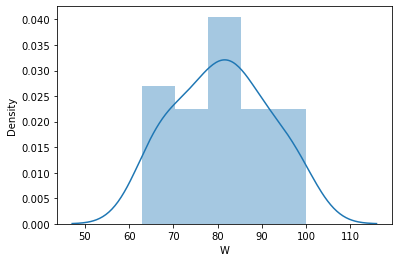

R
1.1398931660307043


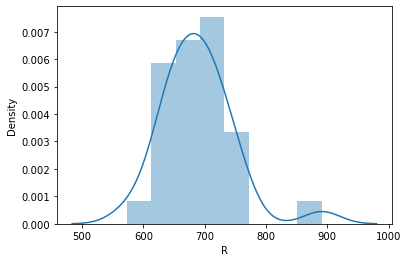

AB
0.17413429032352498


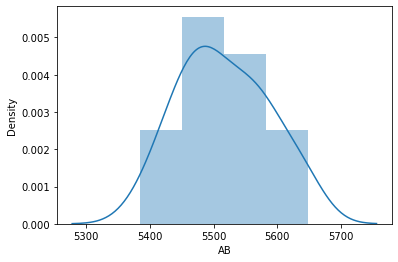

H
0.6362644174348592


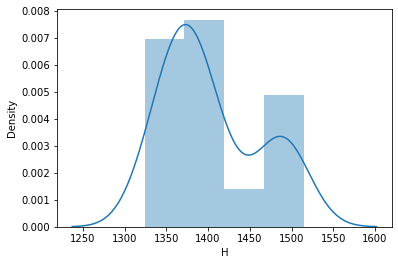

2B
-0.2189534077067715


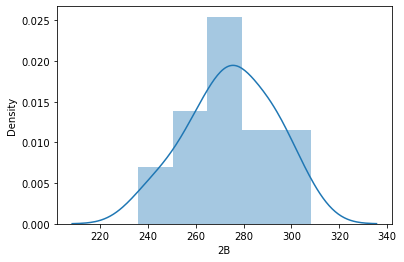

3B
0.12293523975827839


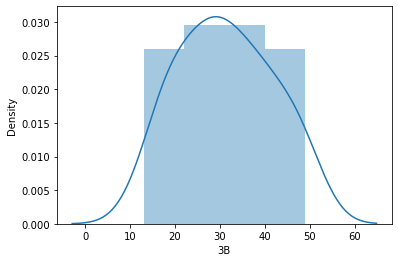

HR
0.49025146140832154


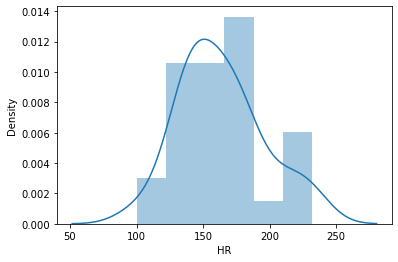

BB
0.15046085271433388


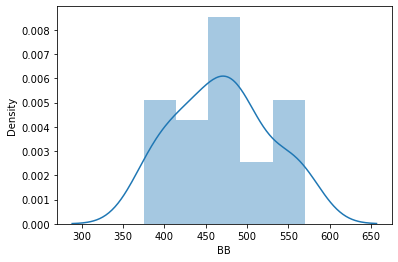

SO
-0.14815122992357777


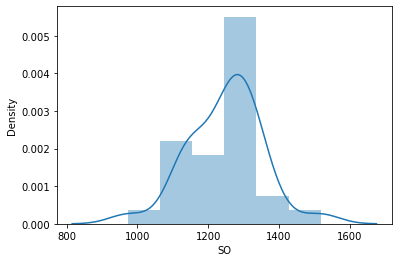

SB
0.4555569751737513


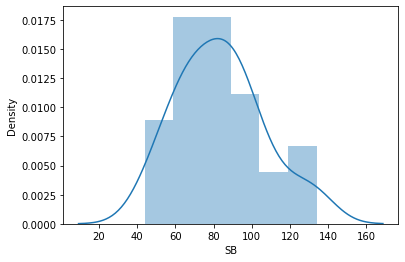

RA
0.04341475534967941


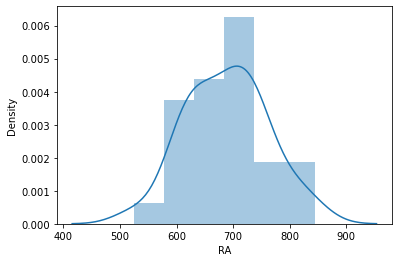

ER
0.055732557686200515


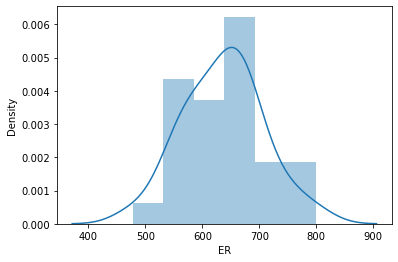

ERA
0.0506268488741678


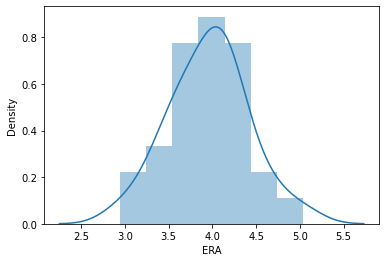

CG
0.6994790420153237


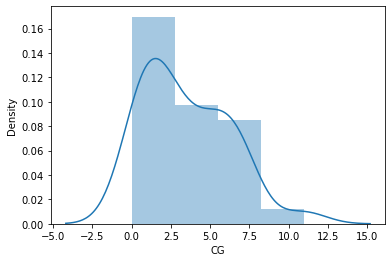

SHO
0.5370985776239573


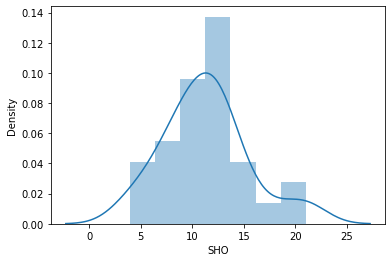

SV
0.6241798071870271


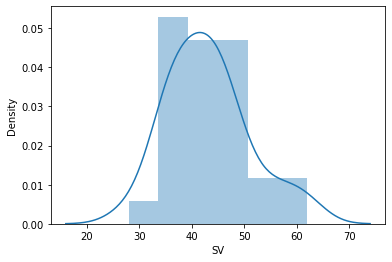

E
0.8449922672006391


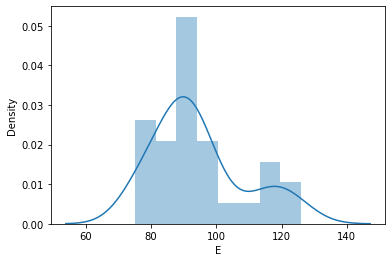

In [12]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

# Define the Function For R2_Score

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y,random_state= r_state,test_size=0.20)
    
        regr.fit(X_train,y_train)

        y_pred = regr.predict(X_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state:",r_state," is:",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2 score corresponding to ", final_r_state," is ", max_r_score)
    return final_r_state

# 1.LINEAR REGRESSION

In [14]:
#ltes check the good fit for linear Regression problem
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,x,y)

r2_score corresponding to random state: 42  is: 0.25928395352760436
r2_score corresponding to random state: 43  is: -1.6579669952554372
r2_score corresponding to random state: 44  is: 0.45588267886542544
r2_score corresponding to random state: 45  is: 0.3201273442339354
r2_score corresponding to random state: 46  is: 0.6086791076000388
r2_score corresponding to random state: 47  is: 0.1275223403814828
r2_score corresponding to random state: 48  is: -0.1483168175376921
r2_score corresponding to random state: 49  is: -0.35525213965404867
r2_score corresponding to random state: 50  is: 0.8402586950388348
r2_score corresponding to random state: 51  is: 0.6782092587437775
r2_score corresponding to random state: 52  is: 0.38592101160346526
r2_score corresponding to random state: 53  is: 0.48815713664034177
r2_score corresponding to random state: 54  is: 0.08424908151314392
r2_score corresponding to random state: 55  is: 0.7900101384277864
r2_score corresponding to random state: 56  is: 0.658

# Cross Validation

In [15]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
#the below cross validation score is less and it shows that we further need to improve our model using more data

array([ 0.7557458 , -0.67830114,  0.66816769, -0.25396453, -0.30350451])

# 2.KNeighbour using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors={"n_neighbors":range(1,25)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 3}

In [17]:
#Check the good fit
knr = KNeighborsRegressor(n_neighbors=3)
r_state = maxr2_score(knr,x,y)

r2_score corresponding to random state: 42  is: 0.3504421376393696
r2_score corresponding to random state: 43  is: -0.21232002915983195
r2_score corresponding to random state: 44  is: 0.29333333333333345
r2_score corresponding to random state: 45  is: -0.9073405535499397
r2_score corresponding to random state: 46  is: 0.41160347190497926
r2_score corresponding to random state: 47  is: 0.6591842723004694
r2_score corresponding to random state: 48  is: 0.3471295060080104
r2_score corresponding to random state: 49  is: -0.9041472451296759
r2_score corresponding to random state: 50  is: 0.23921911421911468
r2_score corresponding to random state: 51  is: 0.5493020658849803
r2_score corresponding to random state: 52  is: 0.43494720063757686
r2_score corresponding to random state: 53  is: 0.1443223443223447
r2_score corresponding to random state: 54  is: 0.316132858837486
r2_score corresponding to random state: 55  is: -0.09482212938346612
r2_score corresponding to random state: 56  is: 0.234

# Cross Validation

In [18]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsRegressor(),x,y,cv=5,scoring="r2")
#the below cross validation score is less and it shows that we further need to improve our model using more data

array([-0.97277273, -2.45210526,  0.42096194,  0.16432787,  0.54080189])

# 3.DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
r_state = maxr2_score(dt,x,y)

r2_score corresponding to random state: 42  is: -0.11937716262975773
r2_score corresponding to random state: 43  is: -1.414434117003827
r2_score corresponding to random state: 44  is: -0.036666666666666625
r2_score corresponding to random state: 45  is: -0.5189530685920578
r2_score corresponding to random state: 46  is: 0.7560529922338968
r2_score corresponding to random state: 47  is: 0.6659330985915493
r2_score corresponding to random state: 48  is: 0.4552736982643525
r2_score corresponding to random state: 49  is: -0.966296163499462
r2_score corresponding to random state: 50  is: -1.352272727272727
r2_score corresponding to random state: 51  is: -0.4452261306532663
r2_score corresponding to random state: 52  is: -0.0902570233114166
r2_score corresponding to random state: 53  is: 0.2445839874411303
r2_score corresponding to random state: 54  is: -0.5106761565836297
r2_score corresponding to random state: 55  is: 0.16824914546145076
r2_score corresponding to random state: 56  is: -0.1

# Cross Validation

In [20]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeRegressor(),x,y,cv=5,scoring="r2")
#the below cross validation score is less and it shows that we further need to improve our model using more data

array([ -1.93181818, -12.06578947,   0.2112087 ,   0.30327869,
         0.53714623])

# 4.RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestRegressor
rtr = RandomForestRegressor()
r_state = maxr2_score(rtr,x,y)

r2_score corresponding to random state: 42  is: 0.54283062283737
r2_score corresponding to random state: 43  is: 0.11008780754510639
r2_score corresponding to random state: 44  is: 0.5897573333333328
r2_score corresponding to random state: 45  is: -0.04785072202166041
r2_score corresponding to random state: 46  is: 0.79767501142074
r2_score corresponding to random state: 47  is: 0.7077576144366198
r2_score corresponding to random state: 48  is: 0.7463564085447261
r2_score corresponding to random state: 49  is: -0.6496168519182501
r2_score corresponding to random state: 50  is: 0.2877181818181823
r2_score corresponding to random state: 51  is: 0.5594675376884426
r2_score corresponding to random state: 52  is: 0.512490854751942
r2_score corresponding to random state: 53  is: 0.6558068445839875
r2_score corresponding to random state: 54  is: 0.5514727758007116
r2_score corresponding to random state: 55  is: 0.5719174325864036
r2_score corresponding to random state: 56  is: 0.4010168082253

# Cross Validation

In [22]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring="r2")
#the below cross validation score is less and it shows that we further need to improve our model using more data

array([ 0.31056625, -5.68403158,  0.49340075,  0.47944672,  0.844301  ])

# 5.LASSO 

In [23]:
#4.LASSO Regression
from sklearn.linear_model import LassoCV
Lr = LassoCV()
r_state = maxr2_score(Lr,x,y)

r2_score corresponding to random state: 42  is: 0.6660236239292499
r2_score corresponding to random state: 43  is: -0.6024200471986116
r2_score corresponding to random state: 44  is: 0.6770041455510816
r2_score corresponding to random state: 45  is: 0.600789015950701
r2_score corresponding to random state: 46  is: 0.8373509681878011
r2_score corresponding to random state: 47  is: 0.8611338318694418
r2_score corresponding to random state: 48  is: 0.6724910187847439
r2_score corresponding to random state: 49  is: 0.1039322601931143
r2_score corresponding to random state: 50  is: 0.7680706541130009
r2_score corresponding to random state: 51  is: 0.6585430382337836
r2_score corresponding to random state: 52  is: 0.4269846881298288
r2_score corresponding to random state: 53  is: 0.7411022720639486
r2_score corresponding to random state: 54  is: 0.27064267952548315
r2_score corresponding to random state: 55  is: 0.40499013915685356
r2_score corresponding to random state: 56  is: 0.4753199696

# Cross Validation

In [24]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LassoCV(),x,y,cv=5,scoring="r2")
#the below cross validation score is less and it shows that we further need to improve our model using more data

array([ 0.60033725, -1.19376656,  0.60330354,  0.86543186,  0.88297838])

# 6.RIDGE

In [25]:
#5.Ridge Regression
from sklearn.linear_model import RidgeCV
rr = RidgeCV()
r_state = maxr2_score(rr,x,y)

r2_score corresponding to random state: 42  is: 0.7785652298383635
r2_score corresponding to random state: 43  is: -1.1906595400797237
r2_score corresponding to random state: 44  is: 0.6850852960935516
r2_score corresponding to random state: 45  is: 0.4050800838711863
r2_score corresponding to random state: 46  is: 0.9186900422831188
r2_score corresponding to random state: 47  is: 0.9555682886063003
r2_score corresponding to random state: 48  is: 0.03445752984120509
r2_score corresponding to random state: 49  is: 0.021755684402986586
r2_score corresponding to random state: 50  is: 0.8447899936628304
r2_score corresponding to random state: 51  is: 0.6390005378001486
r2_score corresponding to random state: 52  is: 0.5250467205096148
r2_score corresponding to random state: 53  is: 0.391856401465174
r2_score corresponding to random state: 54  is: 0.20235478593042877
r2_score corresponding to random state: 55  is: 0.7067117601077858
r2_score corresponding to random state: 56  is: 0.53617761

# Cross Validation

In [26]:
#lets do the cross validation
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.RidgeCV(),x,y,cv=5,scoring="r2")
#the below cross validation score is less and it shows that we further need to improve our model using more data

array([ 0.59523081, -1.01689836,  0.57553635,  0.49239416,  0.50982791])

# Prediction

In [27]:
#RIDGE IS peforming good, so we will choose KNN as our Final model
#RR is model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 47,test_size=0.20)
rr.fit(x_train,y_train)
y_pred=rr.predict(x_test)

In [28]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.368178487624869
r2_score is:  0.9555682886063003


In [29]:
#lets make the dataframe for price_pred
y_pred=pd.DataFrame(y_pred,columns=["W"])

In [30]:
#lets make the dataframe for price_pred
y_pred.head()

,W
0,96.683650
1,74.382128
2,78.342494
3,86.534528
4,76.371517


# Saving the file

In [31]:
#Lets save the submission to csv
y_pred.to_csv("baseball_prediction.csv",index=False)